<a href="https://colab.research.google.com/github/novanjanis322/Customer-Churn-Prediction/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing library

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset link: https://drive.google.com/file/d/1DAAI0noSrYgW9Kdn2wdxfx7x4gXjWSmY/view?usp=sharing



In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## assign data to variable df (dataframe)


In [95]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

##show first 5 data

In [96]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Show number of rows


In [97]:
num_rows = len(df)
print("Number of rows:", num_rows)


Number of rows: 7043


##Show column and its datatype


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Show descriptive statistics


In [99]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##Bar Chart Visualization


<function matplotlib.pyplot.show(close=None, block=None)>

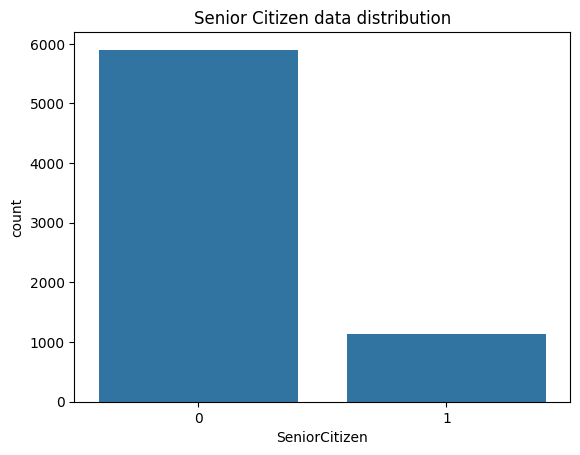

In [100]:
import seaborn as sns
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen data distribution')
plt.show


## Histogram Visualization


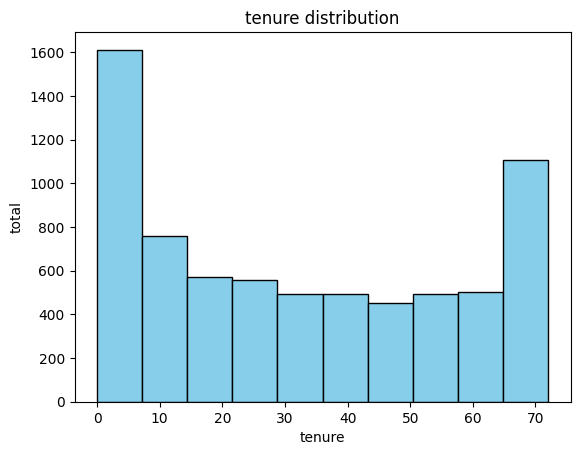

In [101]:
from matplotlib import pyplot as plt
plt.hist(df['tenure'], bins=10, color="skyblue", edgecolor = 'black')

plt.xlabel('tenure')
plt.ylabel('total')
plt.title('tenure distribution')
plt.show()

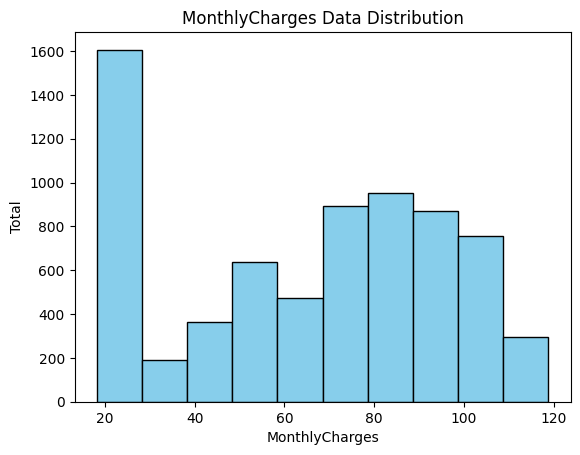

In [102]:
from matplotlib import pyplot as plt
plt.hist(df['MonthlyCharges'], bins=10, color="skyblue", edgecolor = 'black')

plt.xlabel('MonthlyCharges')
plt.ylabel('Total')
plt.title('MonthlyCharges Data Distribution')
plt.show()

##Boxplot

<Axes: >

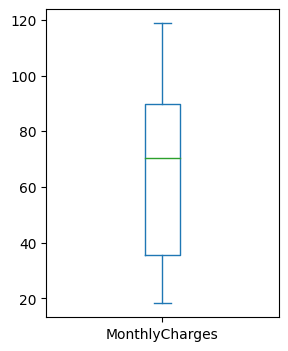

In [103]:
df["MonthlyCharges"].plot(kind='box', figsize=(3, 4))

<Axes: >

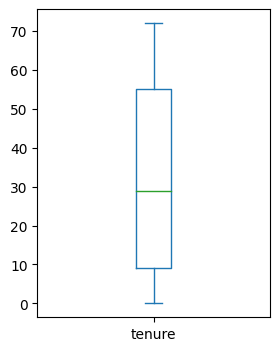

In [104]:
df["tenure"].plot(kind='box', figsize=(3, 4))

##Check null data

In [105]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##Check duplicate data

In [106]:
duplicate_rows = df[df.duplicated()]
print('Duplicate Data =', len(duplicate_rows))

Duplicate Data = 0


##Label Encoding categorical data

In [107]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
string_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


##Correlation Matrix

Variables with the highest correlations with Churn
Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
customerID          0.017447
TotalCharges        0.014479
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

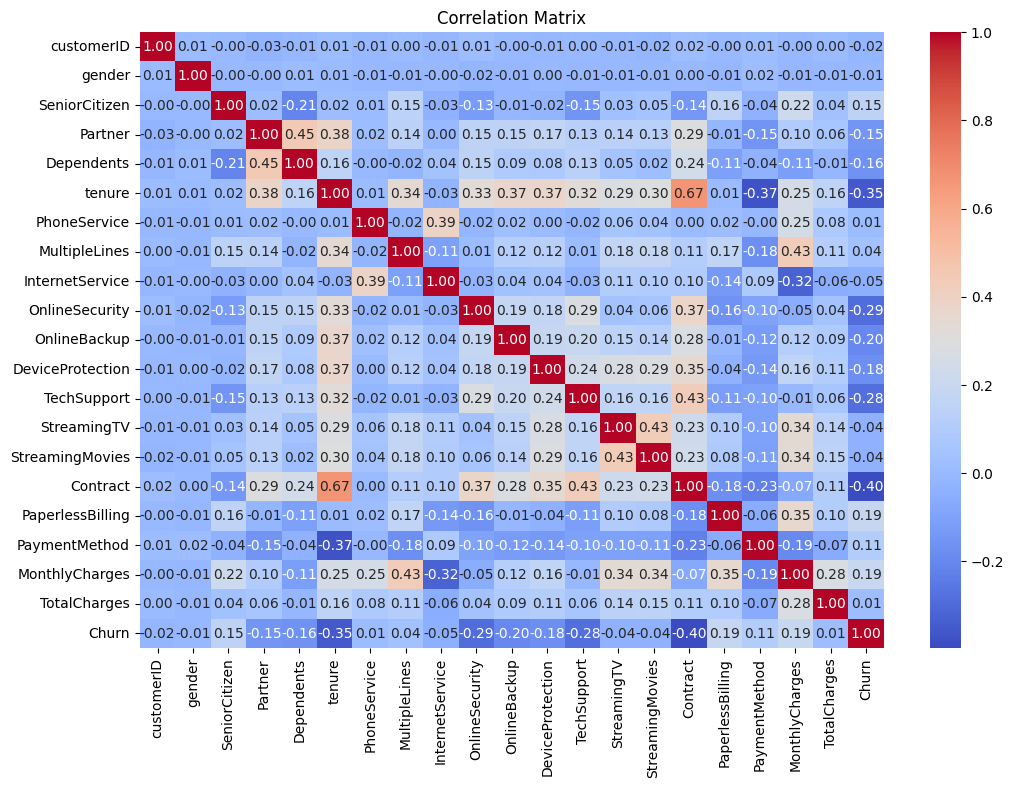

In [109]:
import seaborn as sns

correlation_matrix = df.corr()
target_variable = 'Churn'

correlations_with_target = correlation_matrix[target_variable]

sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

print("Variables with the highest correlations with", target_variable)
print(sorted_correlations)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show

##Column name

In [110]:
column_names = df.columns
print("Column Names:")
print(column_names)

Column Names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


##Preparing features and target variables

In [111]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, shuffle=True, stratify=y)



##Training & Testing Model

In [112]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(splitter='random',random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix: \n ", classification_report(y_test, y_pred))

Accuracy :  73.52732434350602
Confusion Matrix: 
                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.50      0.51      0.51       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



In [113]:
import pandas as pd

class_distribution = df['Churn'].value_counts()

print("Class Distribution:")
print(class_distribution)
print(df['Churn'].count())


Class Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
7043


##Implementing Synthetic Minority Over-sampling Technique (SMOTE)


In [114]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

smote = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42, shuffle=True, stratify=y)

print(y_train.value_counts())

Churn
1    4657
0    4656
Name: count, dtype: int64


In [115]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(splitter='random',random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix: \n ", classification_report(y_test, y_pred))

Accuracy :  88.21256038647343
Confusion Matrix: 
                precision    recall  f1-score   support

           0       0.93      0.82      0.87       518
           1       0.84      0.94      0.89       517

    accuracy                           0.88      1035
   macro avg       0.89      0.88      0.88      1035
weighted avg       0.89      0.88      0.88      1035

